In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, enable=True)

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Reading the data converting into TimeSeries format

In [3]:
# Reading and creating a timeseries dataset
df_solar = pd.read_csv('data/train.csv')
df_solar.insert(loc=0, column='Date', 
                value=pd.to_datetime(df_solar[['Year', 'Month', 'Day', 'Hour', 'Minute']]))
df_solar.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1, inplace=True)
df_solar.set_index(keys='Date', inplace=True)
df_solar.sample(5)

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
Date,,,,,,,,,,,,,
2017-08-24 23:30:00,39,299,77,1,18.0,29.0,1000,52.95,82.74,4.174,22.0,0.7,0
2010-07-26 18:00:00,123,871,972,0,21.0,38.0,1000,41.81,13.15,4.840,220.0,1.3,0
2009-07-21 10:00:00,0,0,0,0,13.0,16.0,1000,86.10,99.10,1.870,5.3,1.1,0
2009-07-07 15:30:00,128,821,836,3,22.0,28.0,1000,72.87,30.32,5.302,272.8,3.4,4
2016-02-19 22:30:00,49,520,143,1,11.0,12.0,1010,97.16,79.65,1.216,155.1,1.2,0


In [4]:
# Reading the test dataset as Val
# Train dataset shall be split into Train and Test
# Val is read to understand the data and null values
df_solar_val = pd.read_csv('data/test.csv')
df_solar_val.insert(loc=0, column='Date', 
                value=pd.to_datetime(df_solar_val[['Year', 'Month', 'Day', 'Hour', 'Minute']]))
df_solar_val.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1, inplace=True)
df_solar_val.set_index(keys='Date', inplace=True)
df_solar_val.sample(5)

,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
Date,,,,,,,,,,,,,
2019-12-26 17:30:00,3,14.7,19.5,1010,73.90,55.21,1.9,89,2.3,0,NaN,NaN,NaN
2019-07-27 05:30:00,0,18.8,21.8,1011,83.13,128.79,2.9,118,0.9,0,NaN,NaN,NaN
2019-11-19 00:00:00,7,7.3,11.7,999,74.23,108.18,1.7,281,1.6,0,NaN,NaN,NaN
2019-03-31 17:30:00,8,8.1,13.1,1007,71.71,27.71,2.9,314,4.5,0,NaN,NaN,NaN
2019-01-25 18:30:00,0,1.7,10.6,1012,53.93,51.74,0.7,325,3.5,0,NaN,NaN,NaN


### Data Check

##### Null Check

In [5]:
df_solar.isnull().sum()

Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

##### Datatype Check anc convert to floats to run tensorflow code

In [6]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175296 entries, 2009-01-01 00:00:00 to 2018-12-31 23:30:00
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Clearsky DHI        175296 non-null  int64  
 1   Clearsky DNI        175296 non-null  int64  
 2   Clearsky GHI        175296 non-null  int64  
 3   Cloud Type          175296 non-null  int64  
 4   Dew Point           175296 non-null  float64
 5   Temperature         175296 non-null  float64
 6   Pressure            175296 non-null  int64  
 7   Relative Humidity   175296 non-null  float64
 8   Solar Zenith Angle  175296 non-null  float64
 9   Precipitable Water  175296 non-null  float64
 10  Wind Direction      175296 non-null  float64
 11  Wind Speed          175296 non-null  float64
 12  Fill Flag           175296 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 18.7 MB


In [7]:
def into_to_float(df):
    for col in df.columns:
        if df[col].dtype == np.int64:
            df[col] = df[col].astype(np.float64)
    return df

In [8]:
df_solar = into_to_float(df_solar)
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175296 entries, 2009-01-01 00:00:00 to 2018-12-31 23:30:00
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Clearsky DHI        175296 non-null  float64
 1   Clearsky DNI        175296 non-null  float64
 2   Clearsky GHI        175296 non-null  float64
 3   Cloud Type          175296 non-null  float64
 4   Dew Point           175296 non-null  float64
 5   Temperature         175296 non-null  float64
 6   Pressure            175296 non-null  float64
 7   Relative Humidity   175296 non-null  float64
 8   Solar Zenith Angle  175296 non-null  float64
 9   Precipitable Water  175296 non-null  float64
 10  Wind Direction      175296 non-null  float64
 11  Wind Speed          175296 non-null  float64
 12  Fill Flag           175296 non-null  float64
dtypes: float64(13)
memory usage: 18.7 MB


In [9]:
df_solar.shape

(175296, 13)

### Scaling of Data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scalar_std = StandardScaler()

##### Small trick to ensure we can perform inverse transform

In [12]:
scalar_std = scalar_std.fit(df_solar)

In [13]:
df_solar.shape

(175296, 13)

In [14]:
df_solar_sc = pd.DataFrame(data=scalar_std.transform(df_solar), index=df_solar.index,  columns=df_solar.columns)
df_solar_sc.sample(2)

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
Date,,,,,,,,,,,,,
2009-03-25 11:30:00,-0.826549,-0.891997,-0.776205,1.475750,-0.312859,-0.477103,1.148093,0.623210,0.040926,-0.045723,-0.381538,0.809057,-0.112603
2018-05-10 11:30:00,0.045709,-0.151516,-0.474103,-0.840696,0.406937,0.283262,0.979621,-0.061813,-0.216525,-0.002413,0.667804,0.028964,0.495704


### Feature Selection

##### Any Non-linear regression model can be selected, Choose XGBoost

In [15]:
from xgboost import XGBRegressor
from xgboost import plot_importance

##### Feature Selection for Clearsky GHI since GHI constitues both DHI, DHI and Zenith Angle

In [16]:
y = df_solar_sc['Clearsky GHI']
X = df_solar_sc.drop(columns='Clearsky GHI', axis=1)

In [17]:
model_xgb = XGBRegressor(n_estimators=100)
model_xgb.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [18]:
model_xgb.feature_importances_

array([3.4929704e-04, 5.0226953e-03, 5.2548199e-05, 1.3788324e-03,
       6.6652277e-04, 1.6511603e-05, 1.9034089e-05, 9.9018139e-01,
       2.2369381e-03, 2.5792026e-05, 2.6344047e-05, 2.4098292e-05],
      dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

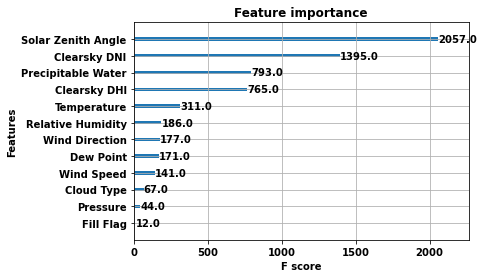

In [19]:
plot_importance(model_xgb)

### Droping not so significant columns

In [20]:
df_solar['Cloud Type'].value_counts()

0.0     82788
7.0     23163
3.0     16255
1.0     15698
8.0     14276
4.0     11738
6.0      7902
2.0      3018
9.0       457
10.0        1
Name: Cloud Type, dtype: int64

In [21]:
df_solar.drop(columns=['Cloud Type', 'Pressure', 'Fill Flag'], inplace=True)
df_solar.sample(2)

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed
Date,,,,,,,,,,
2018-10-25 04:30:00,0.0,0.0,0.0,8.2,14.0,67.91,157.16,1.20,84.0,2.2
2010-01-03 21:00:00,58.0,757.0,285.0,-3.0,2.0,69.00,72.57,0.91,317.1,2.2


In [22]:
df_solar.shape

(175296, 10)

## Model Building Start

### Scaling the Updated Data

In [23]:
scalar_std = StandardScaler()
scalar_std = scalar_std.fit(df_solar)
df_solar_sc = pd.DataFrame(data=scalar_std.transform(df_solar), index=df_solar.index,  columns=df_solar.columns)
df_solar_sc.sample(2)

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed
Date,,,,,,,,,,
2017-07-17 17:30:00,1.525432,1.342959,2.165474,1.151133,0.864718,0.280190,-1.962051,1.721597,0.233524,-0.595110
2014-06-10 04:30:00,-0.826549,-0.891997,-0.776205,1.151133,0.529262,1.048046,0.829743,0.687321,0.355728,-0.517101


### Data Generation

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
# Take only one weeks data for completing the process
total_length = 48*7
# total_length = df_solar_sc.shape[0]

# Dalete this

In [26]:
# This needs to be deleted after completing the training
df_solar_sc = df_solar_sc[:total_length]
df_solar_sc.shape

(336, 10)

In [27]:
X = df_solar_sc.values
y = df_solar_sc[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']].values

In [28]:
# These values need to be updated for full dataset
input_len = 48
output_len = 1
stride_len = 1 # Keep this always 1

In [29]:
ts_generator = TimeseriesGenerator(data=X, targets=y, length=input_len, batch_size=output_len, stride=stride_len)

In [30]:
len(ts_generator)

288

In [31]:
X_gen = []
y_gen = []
for i in range(len(ts_generator)):
    X_temp, y_temp = ts_generator[i]
    # print(f'{X_temp}, {y_temp}')
    X_gen.append(X_temp[0])
    y_gen.append(y_temp)

In [32]:
X_gen = np.array(X_gen)
y_gen = np.array(y_gen)
print(f'X Shape: {X_gen.shape}, y shape: {y_gen.shape}')

X Shape: (288, 48, 10), y shape: (288, 1, 3)


In [33]:
split_length = 48
X_train = X_gen[:-split_length]
X_test = X_gen[-split_length:]
y_train = y_gen[:-split_length]
y_test = y_gen[-split_length:]
print(f'''
X_train.shape: {X_train.shape}
X_test.shape: {X_test.shape}
y_train.shape: {y_train.shape}
y_test.shape: {y_test.shape}''')


X_train.shape: (240, 48, 10)
X_test.shape: (48, 48, 10)
y_train.shape: (240, 1, 3)
y_test.shape: (48, 1, 3)


In [34]:
input_shape = (48, 10)

### Model Building

In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

In [36]:
l0 = Input(shape=input_shape)

l1 = LSTM(units=48, activation='relu', recurrent_dropout=.2, return_sequences=True)(l0)

l2 = LSTM(units=48, activation='relu', recurrent_dropout=.2)(l1)

y = Dense(units=10, activation='relu')(l2)
y = Dense(units=3, activation='linear')(y)

model_lstm1 = Model(inputs=l0, outputs=y)

In [37]:
model_lstm1.compile(optimizer=Adam(learning_rate=0.001), 
                    loss=MeanSquaredError(),
                   metrics=[RootMeanSquaredError()])
model_lstm1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 10)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 48, 48)            11328     
_________________________________________________________________
lstm_1 (LSTM)                (None, 48)                18624     
_________________________________________________________________
dense (Dense)                (None, 10)                490       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
Total params: 30,475
Trainable params: 30,475
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Check points for Early stopping and Saving the best model
cb_earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
cb_modelcp = ModelCheckpoint('best_model_lstm1.h5', monitor='val_root_mean_squared_error', 
                             mode='min', verbose=1, save_best_only=True)

In [39]:
model_lstm1_hist = model_lstm1.fit(X_train, y_train, 
                                   validation_data=(X_test, y_test), 
                                   epochs=50, callbacks=[cb_earlystop, cb_modelcp])

Epoch 1/2
8/8 [==============================] - 6s 336ms/step - loss: 0.6658 - root_mean_squared_error: 0.8138 - val_loss: 0.7312 - val_root_mean_squared_error: 0.8275

Epoch 00001: val_root_mean_squared_error improved from inf to 0.82750, saving model to best_model_lstm1.h5
Epoch 2/2
8/8 [==============================] - 2s 310ms/step - loss: 0.6406 - root_mean_squared_error: 0.7988 - val_loss: 0.7242 - val_root_mean_squared_error: 0.8103

Epoch 00002: val_root_mean_squared_error improved from 0.82750 to 0.81033, saving model to best_model_lstm1.h5


In [40]:
model_lstm1.load_weights('best_model_lstm1.h5')

In [45]:
def plot_model_history(model):
    mod_hist = model.history
    plt.subplot(1, 2, 1)
    plt.plot(mod_hist.history['loss'])
    plt.plot(mod_hist.history['val_loss'])
    plt.title('Loss MSE')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.subplot(1, 2, 2)
    plt.plot(mod_hist.history['root_mean_squared_error'])
    plt.plot(mod_hist.history['val_root_mean_squared_error'])
    plt.title('Error RMSE')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')

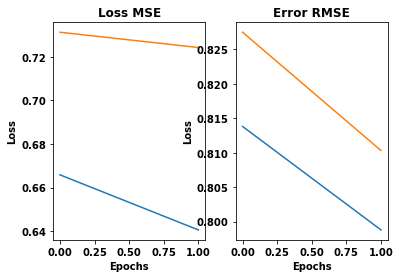

In [46]:
plot_model_history(model=model_lstm1)

In [47]:
y_pred = model_lstm1.predict(X_train[-split_length:])

In [50]:
y_pred.shape

(48, 3)

##### Inverse Scaling the data

In [51]:
df_solar_total = df_solar[:total_length][['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']]
df_solar_train = df_solar_total[:-split_length]
df_solar_test = df_solar_total[-split_length:]

In [53]:
df_y_pred = pd.DataFrame(data=y_pred, index=df_solar_test.index, 
             columns=['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'])

In [54]:
df_solar.columns[3:]

Index(['Dew Point', 'Temperature', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction', 'Wind Speed'],
      dtype='object')

In [57]:
df_temp_inv_trans = pd.DataFrame(data=X_test[0][:,3:], index=df_solar_test.index, columns=df_solar.columns[3:])

In [58]:
y_pred = pd.concat([df_y_pred, df_temp_inv_trans], axis=1)

In [59]:
y_pred_sc_inv = scalar_std.inverse_transform(y_pred)

In [68]:
df_solar_pred = pd.DataFrame(data=y_pred_sc_inv, index=df_solar_test.index, columns=df_solar.columns)
df_solar_pred = df_solar_pred[['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']]
df_solar_pred.sample(2)

,Clearsky DHI,Clearsky DNI,Clearsky GHI
Date,,,
2009-01-07 19:00:00,49.970259,271.144515,241.970618
2009-01-07 08:30:00,51.931262,289.046385,222.574708


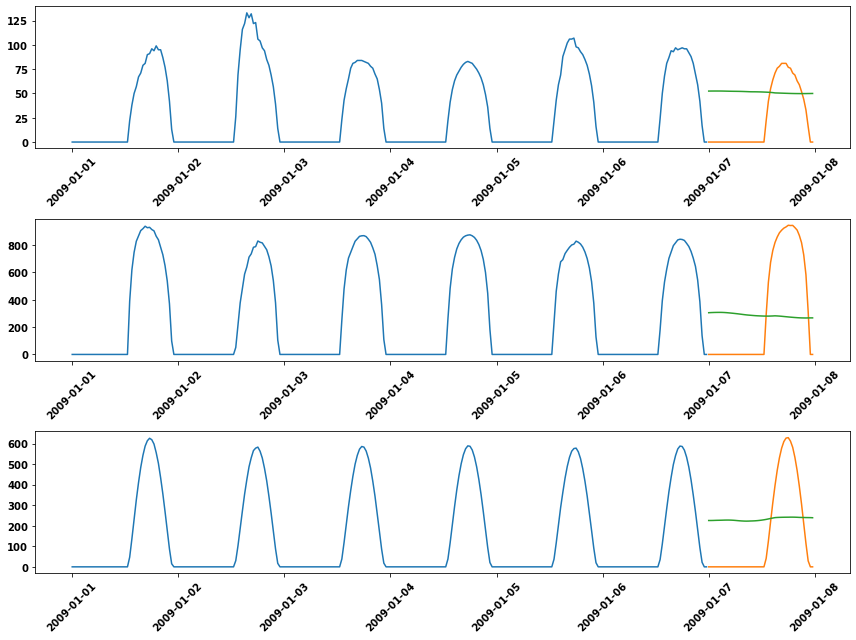

In [69]:
plt.figure(figsize=(12, 9))
cnt = 1
for col in df_solar_pred.columns:
    plt.subplot(3, 1, cnt)
    plt.plot(df_solar_train[col], label='train')
    plt.plot(df_solar_test[col], label='test')
    plt.plot(df_solar_pred[col], label='Pred')
    plt.xticks(rotation=45)
    cnt += 1

plt.tight_layout()
plt.show()